In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/JR_project")

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
#read csv file to dataframe
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')

In [ ]:
#obtain the total amount of data
aisles_df.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [ ]:
departments_df.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [ ]:
orders_df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [ ]:
products_df.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [ ]:
order_products_train.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


In [ ]:
order_products_prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [ ]:
print(f'The shape of order_products_train: {order_products_train.shape}')
order_products_train.head(10)

The shape of order_products_train: (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [ ]:
print(f'The shape of order_products_prior: {order_products_prior.shape}')
order_products_prior.head(10)

The shape of order_products_prior: (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [ ]:
print('Shape of products table: ', products_df.shape)
print('Uniques products', products_df['product_name'].nunique())
products_df.head(10)

Shape of products table:  (49688, 4)
Uniques products 49629


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [ ]:
organic = products_df['product_name'].str.contains('Organic')
products_df['is_organic'] = organic
products_df.iloc[100:110].head()

,product_id,product_name,aisle_id,department_id,is_organic
100,101,Bread Healthy Whole Grain,112,3,False
101,102,Danish Butter Cookies,61,19,False
102,103,Sprouted Kale Cracker,78,19,False
103,104,High Fiber Tomato Basil Soup,69,15,False
104,105,Easy Grab 9x13 Oblong Glass Bakeware,10,17,False


In [ ]:
print('Shape of departments table: ', departments_df.shape)
departments_df.head(21)

Shape of departments table:  (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
print('Shape of aisles table: ', aisles_df.shape)
aisles_df.head(10)

Shape of aisles table:  (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [ ]:
print('Shape of Orders table: ', orders_df.shape)
orders_df.head(15)

Shape of Orders table:  (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
import os
import zipfile
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from IPython.display import display
import random


# define Seaborn color palette to use
# colors = sns.color_palette("hls", 8)
colors = sns.color_palette("crest", 8)
cmap_colors = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

# define the fig size of all figures
plt.rcParams["figure.figsize"] = (10,6)

# Converting the days and hours from numbers to their interpretable form
days_of_week = {0: 'Saturday', 
                1: 'Sunday', 
                2: 'Monday',
                3: 'Tuesday',
                4: 'Wednesday',
                5: 'Thursday',
                6: 'Friday'}
hour_nums = list(range(24))
hours_of_day = {hour_num:datetime.time(hour_num).strftime("%I:00 %p") for hour_num in hour_nums}

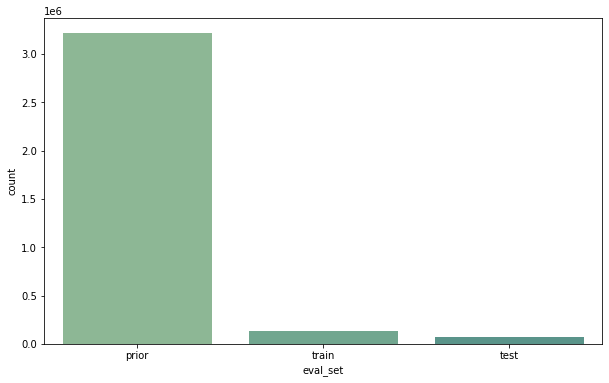

In [ ]:
# Count of prior, train, test orders given in the data
sns.countplot(x='eval_set', data=orders_df, palette=colors)
plt.show()

In [ ]:
# Merging the Prior and train order_products
order_products = pd.concat([order_products_train, order_products_prior])
order_products = order_products.merge(products_df, on='product_id', how='left').merge(orders_df, on='order_id', how='left').merge(departments_df, on='department_id').merge(aisles_df, on='aisle_id')

# Count of total orders
total_orders = order_products['order_id'].nunique()
print('Count of total orders: ', total_orders)

print('Merging products, order_products, and orders tables...')

order_products.head(10)

Count of total orders:  3346083
Merging products, order_products, and orders tables...


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,False,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,False,56463,train,41,3,8,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,False,182389,train,7,0,13,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,False,184099,train,7,3,9,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,False,184099,train,7,3,9,30.0,dairy eggs,yogurt
5,878,23044,3,0,Cream Top Smooth & Creamy Vanilla Yogurt,120,16,False,61911,train,9,2,13,30.0,dairy eggs,yogurt
6,915,19977,11,0,Light & Fit Greek Cherry Yogurt,120,16,False,166117,train,4,1,16,30.0,dairy eggs,yogurt
7,1032,11063,1,1,Clover Org Greek Plain,120,16,False,164808,train,18,1,15,30.0,dairy eggs,yogurt
8,1145,47409,9,1,Original Red Raspberry Yogurt,120,16,False,127134,train,10,5,9,7.0,dairy eggs,yogurt
9,1145,5069,17,1,Danimals Strawberry Explosion & Strikin' Straw...,120,16,False,127134,train,10,5,9,7.0,dairy eggs,yogurt


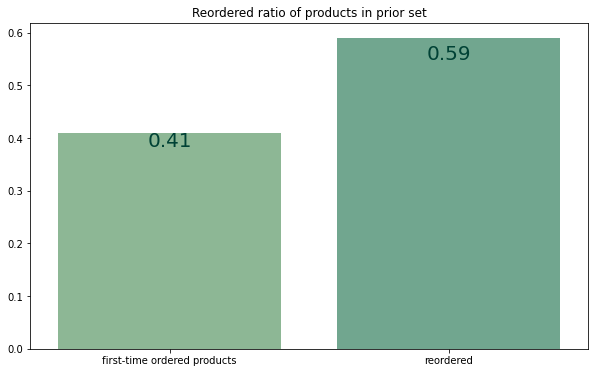

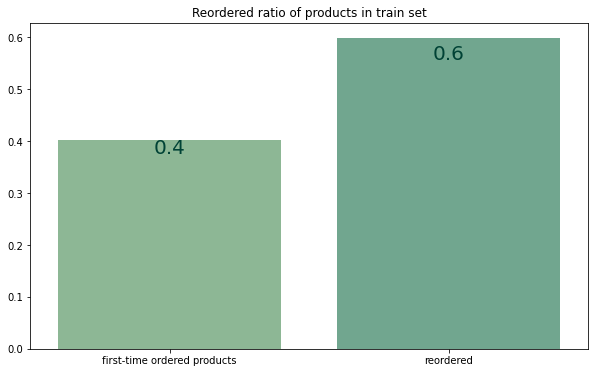

In [ ]:
# Annotate text on graph
def annotate_text(p, append_to_text='%'):
  for p in ax.patches:
    txt = str(p.get_height().round(2)) + append_to_text
    txt_x = p.get_x() + p.get_width()/2.
    txt_y = 0.92*p.get_height()
    ax.text(txt_x,txt_y,txt, fontsize=20, color='#004235', ha='center', va='bottom')



total_prod_count = order_products_prior.shape[0]
reorder_ratio = order_products_prior['reordered'].value_counts()/total_prod_count
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values, palette=colors)
ax.set_xticklabels(['first-time ordered products', 'reordered'])
annotate_text(ax, append_to_text='')
plt.title('Reordered ratio of products in prior set')
plt.show()

total_prod_count = order_products_train.shape[0]
reorder_ratio = order_products_train['reordered'].value_counts()/total_prod_count
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values, palette=colors)
ax.set_xticklabels(['first-time ordered products', 'reordered'])
annotate_text(ax, append_to_text='')
plt.title('Reordered ratio of products in train set')
plt.show()

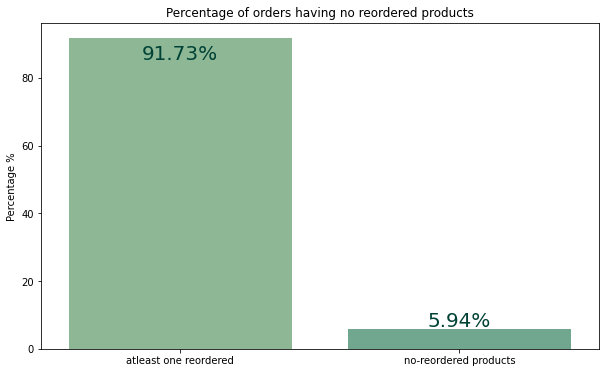

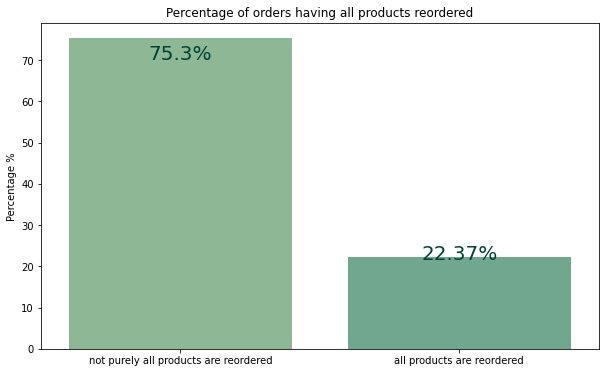

,order_id,reordered_ratio,order_number,no_reordered,all_reordered
0,1,0.500000,4,False,False
1,2,0.666667,3,False,False
2,3,1.000000,16,False,True
3,4,0.923077,36,False,False
4,5,0.807692,42,False,False


In [ ]:
groupeddf = order_products.groupby(['order_id']).agg({'reordered':'mean', 'order_number':'first'}).reset_index().rename(columns={'reordered':'reordered_ratio'})
groupeddf['no_reordered'] = groupeddf['reordered_ratio'] == 0
groupeddf['all_reordered'] = groupeddf['reordered_ratio'] == 1.0

# Count of non-first orders
non_first_orders_Mask = orders_df.order_number != 1
non_first_orders_count = np.sum(non_first_orders_Mask)

# Ratio of non-first orders containing no previously ordered products vs containing at least one previously ordered products
groupeddf = groupeddf[groupeddf.order_number != 1]
groupeddf['no_reordered'] = groupeddf['reordered_ratio'] == 0
no_reordered_count = groupeddf['no_reordered'].value_counts()/non_first_orders_count * 100
ax = sns.barplot(x=no_reordered_count.index, y=no_reordered_count.values, palette=colors)
annotate_text(ax)
ax.set_xticklabels(['atleast one reordered', 'no-reordered products'])
plt.title('Percentage of orders having no reordered products')
plt.ylabel('Percentage %')
plt.show()

# Ratio of non-first orders where their products were all previously purchased
groupeddf['all_reordered'] = groupeddf['reordered_ratio'] == 1.0
all_reordered_count = groupeddf['all_reordered'].value_counts()/non_first_orders_count * 100
ax = sns.barplot(x=all_reordered_count.index, y=all_reordered_count.values, palette=colors)
annotate_text(ax)
ax.set_xticklabels(['not purely all products are reordered', 'all products are reordered'])
plt.title('Percentage of orders having all products reordered')
plt.ylabel('Percentage %')
plt.show()

groupeddf.head()

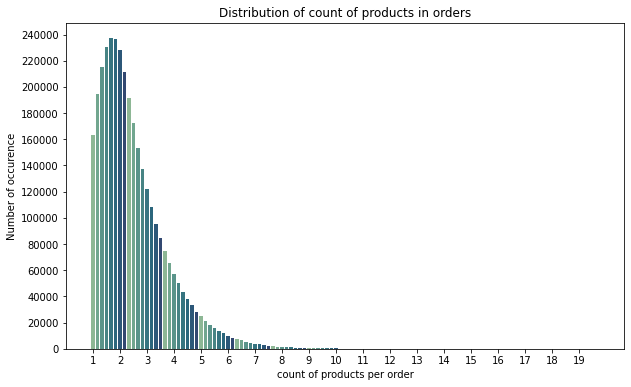

In [ ]:
# Ploting a histogram for the # of products in an order
count_of_products = order_products.groupby(['order_id'], as_index=False)['product_id'].count()
count_of_products['count_of_products'] = count_of_products['product_id']
sns.countplot(x='count_of_products', data=count_of_products, palette=colors)
plt.xlabel('count of products per order')
plt.ylabel('Number of occurence')
plt.title('Distribution of count of products in orders')
plt.locator_params(nbins=20)
plt.show()

del count_of_products

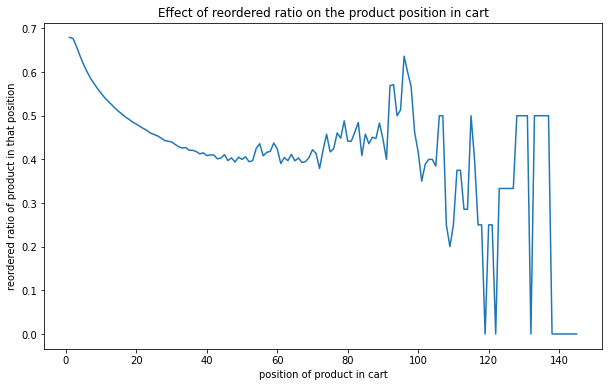

In [ ]:
# Relation between the order number and the reorder ratio of that order

# Relation between the add to cart postiion and the reorder ratio of that product
groupeddf = order_products.groupby(['add_to_cart_order']).agg({'reordered':'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
sns.lineplot(x=groupeddf['add_to_cart_order'], y=groupeddf['reordered_ratio'], palette=colors)
plt.title('Effect of reordered ratio on the product position in cart')
plt.xlabel('position of product in cart')
plt.ylabel('reordered ratio of product in that position')
plt.show()